In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

In [3]:
X

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

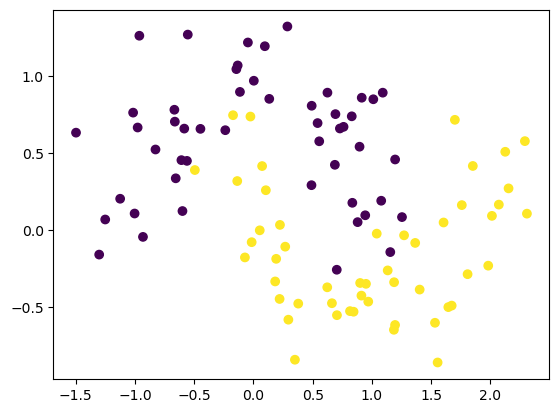

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:

model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=100, validation_split = 0.2,verbose=0)

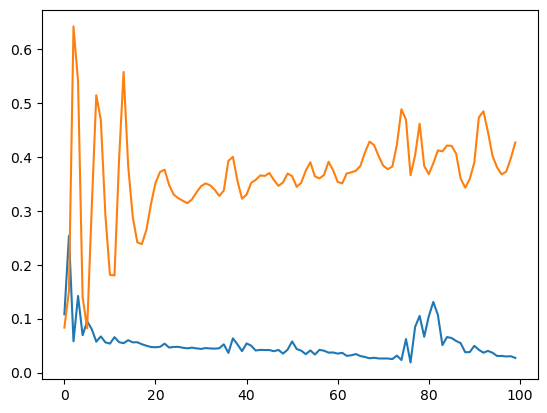

In [21]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step


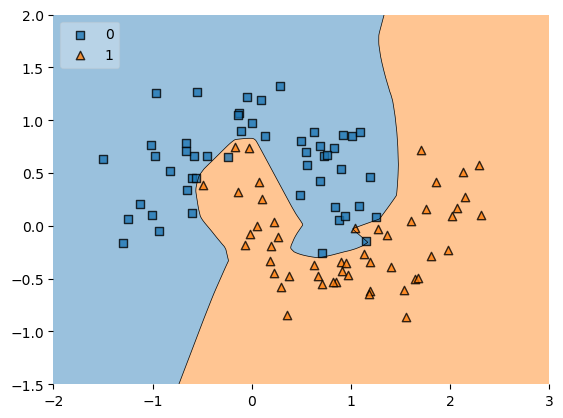

In [23]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [24]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=100, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step


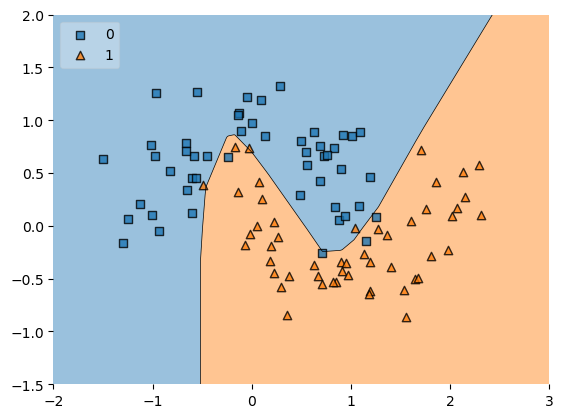

In [26]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

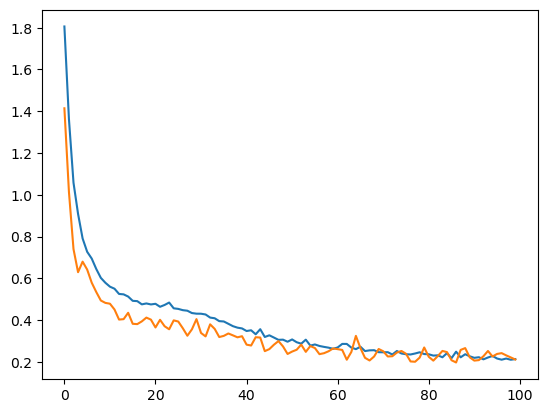

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [28]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

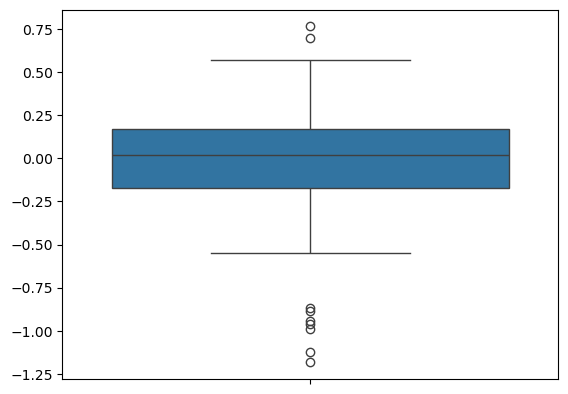

In [29]:
sns.boxplot(model1_weight_layer1)

<Axes: >

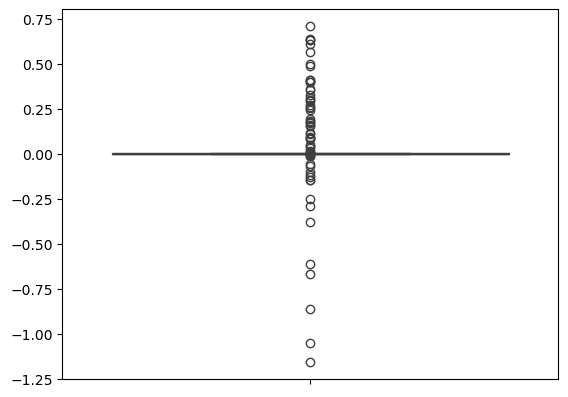

In [30]:
sns.boxplot(model2_weight_layer1)

In [31]:
model1_weight_layer1.min()

np.float32(-1.1846386)

In [32]:
model2_weight_layer1.min()

np.float32(-1.1590748)

C:\Users\user\AppData\Local\Temp\ipykernel_26536\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\user\AppData\Local\Temp\ipykernel_26536\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

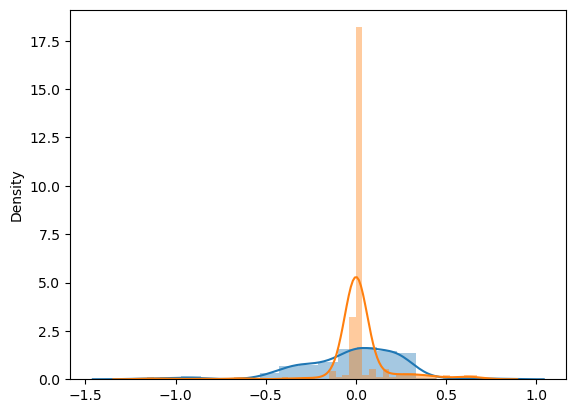

In [33]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [34]:
model1.get_weights()[0].reshape(256)

array([ 1.21014558e-01,  3.97586301e-02, -5.51932752e-01, -3.22478443e-01,
        2.81582564e-01, -3.58845353e-01, -3.54897052e-01,  2.14626223e-01,
        2.24339515e-01, -5.10170646e-02,  3.55881229e-02, -4.32475835e-01,
       -2.93205649e-01,  2.58569181e-01, -1.67431325e-01,  9.90556851e-02,
       -1.91896379e-01,  1.19546175e-01,  1.00058019e-01, -4.30061877e-01,
       -3.18311900e-01,  2.16554895e-01,  2.34898046e-01, -3.54344398e-01,
        2.97918636e-02,  1.09472452e-03, -2.49051899e-01, -4.31320667e-01,
        2.50462592e-01,  1.33968145e-01,  1.70907319e-01,  2.32818946e-01,
        2.12203279e-01, -1.31794875e-02, -2.03394771e-01, -2.08990723e-01,
       -4.88332519e-03, -3.66492957e-01,  7.98550844e-02,  2.47929022e-01,
       -1.37627259e-01, -4.65681255e-01,  1.04301572e-01,  1.17880618e-02,
       -2.41719056e-02, -2.92629004e-01, -2.54824638e-01,  1.15088932e-03,
       -3.13626111e-01, -3.08715403e-01, -4.31592226e-01,  2.43714422e-01,
        2.29111552e-01,  